# ISLR - Notes and take aways 

## Chapter 1

### Descriptive Analysis of Wage data (Quantitative Variable)

In [22]:
import pandas as pd
import numpy as np

In [15]:
# Readin wage data in our environment.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Wage.csv"
df = pd.read_csv(url, error_bad_lines = False)

df.head()

,Unnamed: 0,Unnamed: 0.1,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


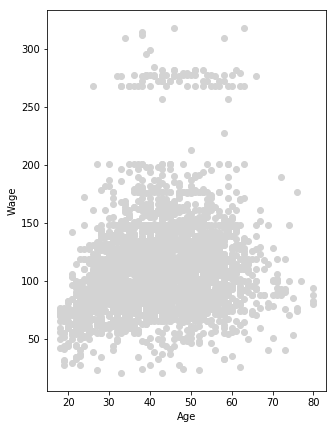

In [38]:
# Scatter plot of age and wage.
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,7))
plt.scatter(df.age, df.wage, color = "lightgrey")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

In [85]:
#the plot above shows a lot of variance. We can fit a quadratic equation and see the trend
z = np.polyfit(df.age, df.wage, 5)
f = np.poly1d(z)
print(f)

            5             4           3         2
-9.157e-07 x + 0.0001835 x - 0.01265 x + 0.276 x + 3.993 x - 49.7


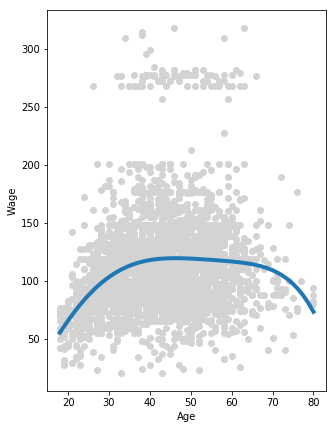

In [86]:
age_new = np.linspace(min(df.age), max(df.age), 50)
wage_new = f(age_new)

fig = plt.figure(figsize = (5,7))
plt.scatter(df.age, df.wage, color = "lightgrey")
plt.plot(age_new, wage_new, linewidth = 4.0)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

We can see that wage increase as the age increase and then stabilize and then start decreasing after age 60 approx.
But this curve also has a very high variablilty associated with it. So this variable alone cannot predict the wage.

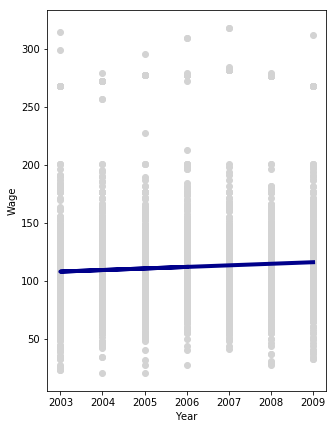

In [83]:
# Scatter plot of year and wage.
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,7))
plt.scatter(df.year, df.wage, color = "lightgrey")

z = np.polyfit(df.year, df.wage, 1)
f = np.poly1d(z)
plt.plot(df.year, f(df.year), linewidth = 4.0, color = "darkblue")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.show()

The incresing linear trend shows that Year is associated with wage but the variablility associated makes it less relevant.

In [ ]:
df["education_level"] = df.education.str[:1]

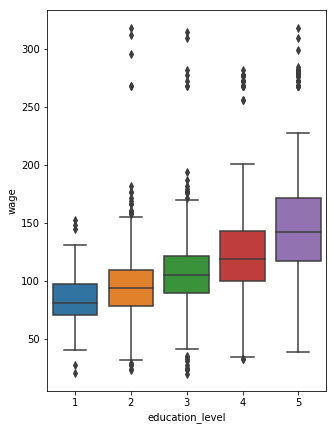

In [94]:
# Wage distribution across Education level.
import seaborn as sns
fig = plt.figure(figsize = (5,7))
ax = sns.boxplot(x ="education_level", y = "wage", data = df)

This plot clearly shows the association of wages and education level. Increase in education level shows increase in wages as well.

For predicting the wages, we can combine the 3 variables that we have explored.
This kind of prediction of continous variable is called a __regression problem__.

### Descriptive analysis of stock data (Qualitative Variable)

In [99]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Smarket.csv"
Stock = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Text(0.5,0,"Today's Direction")

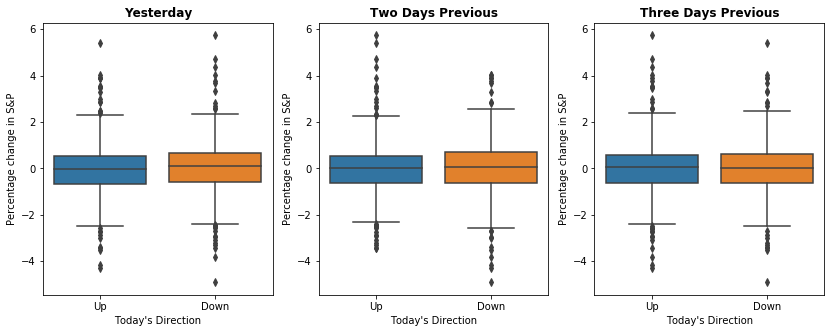

In [120]:
# Plotting of Lag variables across Direction variable to see the association.

plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
ax = sns.boxplot(x ="Direction", y = "Lag1", data = Stock)
ax.set_title("Yesterday", fontweight = "bold")
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")

plt.subplot(1,3,2)
ax = sns.boxplot(x ="Direction", y = "Lag2", data = Stock)
ax.set_title("Two Days Previous", fontweight = "bold")
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")

plt.subplot(1,3,3)
ax = sns.boxplot(x ="Direction", y = "Lag3", data = Stock)
ax.set_title("Three Days Previous", fontweight = "bold")
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")

Here we are looking at the problem wheather the stock will go up or down based on previous days change in stock value. This kind of problem is called __classification problem__.

The 2 box plots in all the plots seems identical. This means that simply using previous day's movement won't be very helpful in predicting today's direction.


## Chapter 2
## Statitical Learning 
 Tools to understand data

For a quantitative response __Y__ and __p__ different predictors $X_1$, $X_2$,..., $X_p$. 

We assume there is a relationship between Y and X = ($X_1$, $X_2$,..., $X_p$).
$$y = f(x) + \epsilon$$
$\epsilon$ is random error which is independent of X and mean 0.

Statistical learning refers to how to estimate __f__ .

For e.g. We can predict sales based on expenditure in advertising through different channels.
Then use this model to see how much each advertising expenditure of each channel is associated to sales.

In [122]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Advertising.csv"
Advertising = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Text(0,0.5,'Sales')

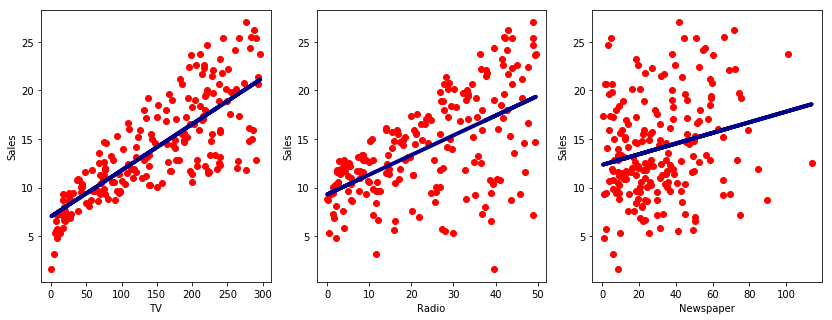

In [147]:
fig = plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
ax = plt.scatter(Advertising.TV, Advertising.Sales,color = "red")

z = np.polyfit(Advertising.TV, Advertising.Sales, 1)
f = np.poly1d(z)
plt.plot(Advertising.TV, f(Advertising.TV), linewidth = 4.0, color = "darkblue")
plt.xlabel("TV")
plt.ylabel("Sales")

plt.subplot(1,3,2)
ax = plt.scatter(Advertising.Radio, Advertising.Sales,color = "red")

z = np.polyfit(Advertising.Radio, Advertising.Sales, 1)
f = np.poly1d(z)
plt.plot(Advertising.Radio, f(Advertising.Radio), linewidth = 4.0, color = "darkblue")
plt.xlabel("Radio")
plt.ylabel("Sales")

plt.subplot(1,3,3)
ax = plt.scatter(Advertising.Newspaper, Advertising.Sales,color = "red")

z = np.polyfit(Advertising.Newspaper, Advertising.Sales, 1)
f = np.poly1d(z)
plt.plot(Advertising.Newspaper, f(Advertising.Newspaper), linewidth = 4.0, color = "darkblue")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

The above scatter plot shows the association of each of the channel expenditure with sales. The blue line shows the simple model that can be used to predict sales.